<a href="https://colab.research.google.com/github/PuruBhatnagar1197/ABtesting/blob/main/epsilon_greedy_with_gaussian_rewards.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
class BanditArm():
    def __init__(self,m):
        self.m=m
        self.m_estimate=0
        self.N=0
    def pull(self):
        return np.random.randn()+self.m ### this is actually your reward which is given by using a random uniform function and adding mena to it to get the reward
    def update(self, x):
        self.N+=1
        self.m_estimate=((self.N-1)*self.m_estimate+x)/self.N


In [19]:
def experiment(m1,m2,m3,eps,Num_of_exp):
    bandit=[BanditArm(m1),BanditArm(m2),BanditArm(m3)]
    rewards=np.zeros(Num_of_exp)
    best_m=np.argmax([m1,m2,m3])
    count_of_suboptimal=0

    for i in range(Num_of_exp):
        p=np.random.uniform()
        if  p<eps:
            j=np.random.randint(len(bandit))
        else:
            j=np.argmax([b.m_estimate for b in bandit])
        x=bandit[j].pull()
        rewards[i]=x
        bandit[j].update(x)
        if j!=best_m:
            count_of_suboptimal+=1

    cumulative_average=(np.cumsum(rewards))/(np.arange(Num_of_exp)+1)
    ### for plotting cumsum
    plt.plot(cumulative_average)
    plt.plot(np.ones(Num_of_exp)*m1)
    plt.plot(np.ones(Num_of_exp)*m2)
    plt.plot(np.ones(Num_of_exp)*m3)
    ### for suboptimal
    print("number of suboptimal times: ",count_of_suboptimal)
    print("%age of suboptimal times: ",(count_of_suboptimal/Num_of_exp)*100)

    for b in bandit:
        print("estimated_param: ", b.m_estimate)
    return cumulative_average


number of suboptimal times:  6565
%age of suboptimal times:  6.565
estimated_param:  1.5173275128987427
estimated_param:  2.5077582661066193
estimated_param:  3.4993912577637305
number of suboptimal times:  3440
%age of suboptimal times:  3.44
estimated_param:  1.5064684728649094
estimated_param:  2.519086362118265
estimated_param:  3.497363706484679
number of suboptimal times:  749
%age of suboptimal times:  0.749
estimated_param:  1.4688197477195104
estimated_param:  2.535039734936604
estimated_param:  3.49932304741906


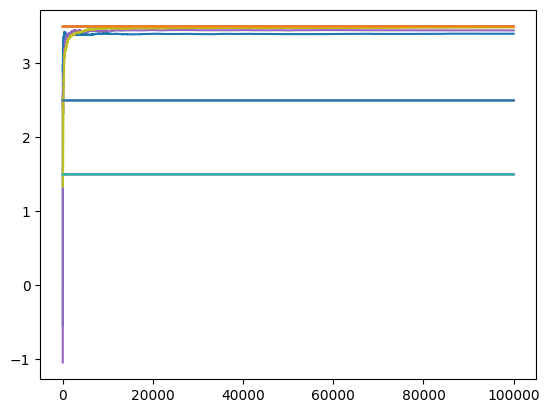

In [22]:
m1, m2, m3 = 1.5, 2.5, 3.5 ## for three different machines

## below are for the different epsilons
c_1 = experiment(m1, m2, m3, 0.1, 100000)
c_05 = experiment(m1, m2, m3, 0.05, 100000)
c_01 = experiment(m1, m2, m3, 0.01, 100000)

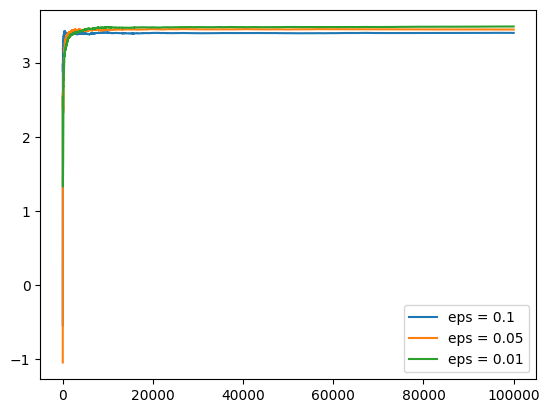

In [23]:
  # linear plot
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.show()

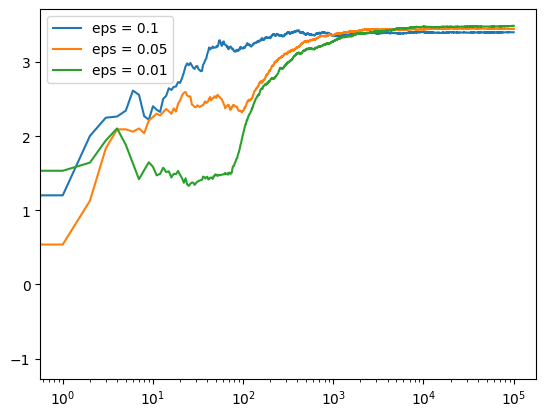

In [24]:
  # log scale plot   ### use this kind of scale (log) for much smaller values
  plt.plot(c_1, label='eps = 0.1')
  plt.plot(c_05, label='eps = 0.05')
  plt.plot(c_01, label='eps = 0.01')
  plt.legend()
  plt.xscale('log')
  plt.show()
  ### se how for epsilon it converges fastly and it is giving the best results too (so there can be a tradeoff in practical when you have to see how fast a algo converge and how quickly it generate optimal results)